# Features selection

In this script, we remove different groups of features from training to see when the performance decreases

To run this script, the following data files are needed:
- dt_final.xlsx (+)

Saved models:
- xgboost_no_enrichm.model (+)
- xgboost_no_tfidf.model (+)
- xgboost_no_lex.model (+)
- xgboost_no_liwc.model (+)
- xgboost_no_bias_lex.model (+)
- xgboost_no_context.model (+)

(attached: +, not attached: -)

In [6]:
!pip install scikit-plot

In [1]:
# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
from xgboost import plot_tree
import seaborn as sns

# data
import pandas as pd
import numpy as np
import csv

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
#import scikitplot as skplt
import xgboost

In [2]:
os.chdir('C:/Users/shiva/Desktop/Master_Thesis/final-data')
data = pd.read_csv('dt_final_new_features.csv')

C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1 Data preparation

In [3]:
dt = data[[
 'label4',
 'glove_vec300_norm', # normalize
 'tfidf_art', # normalize
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'action_verbs',
 'comparative_forms',
 'modal_adverbs',
 'manner_adverbs',
 'superlative_forms',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
#  'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'action_verbs_context',
 'comparative_forms_context',
 'modal_adverbs_context',
 'manner_adverbs_context',
 'superlative_forms_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
#  'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [4]:
print('Number of missing values:')
mis = (dt.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
dt = dt.dropna(subset=['tfidf_art'])

Number of missing values:
tfidf_art 2142


In [5]:
x = dt.drop(['label4'], 1)
y4 = dt[['label4']]

In [6]:
# train-test split
train_features, test_features, train_labels, test_labels = train_test_split(x, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [7]:
feature_names = list(x.columns)
len(feature_names)

290

In [8]:
# matrix for XGBoost
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (58268, 290)
Training Labels Shape: (58268, 1)
Testing Features Shape: (6475, 290)
Testing Labels Shape: (6475, 1)
Training Features for final model Shape: (52441, 290)
Training Labels for final model Shape: (52441, 1)
Validation Features Shape: (5827, 290)
Validation Labels Shape: (5827, 1)


## 2 Features selection

### 2.1 Final model (all features)

In [10]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_tuned_weighted.save_model("xgboost_tuned_weighted.model")
xgboost_tuned_weighted = xgboost.Booster()
xgboost_tuned_weighted.load_model("xgboost_tuned_weighted.model")

In [11]:
feat_imp = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
feat_imp = feat_imp.reset_index()
feat_imp = feat_imp.rename(columns={"index": "feature", 0: "score"})
feat_imp = feat_imp.sort_values(by=['score'], ascending=False)

feat_imp['name'] = None
for i, feat in enumerate(feature_names):
    #print(i, feat)
    f = 'f'+str(i)
    feat_imp['name'] = feat_imp.apply(lambda row: feat if row['feature']==f else row['name'], axis=1)

feat_imp

,feature,score,name
0,f2,259.468694,negative_conc
5,f81,84.406425,pos_PROPN
4,f5,75.172208,strong_subj
1,f73,72.352227,pos_ADJ
23,f149,44.732957,strong_subj_context
...,...,...,...
88,f98,3.051508,dep_ccomp
58,f100,2.762994,dep_conj
57,f117,2.370646,dep_pcomp
42,f167,2.052819,negemo _context


### 2.2 Vary importance score [>10 ... >400]

In [12]:
imp_feats = list(feat_imp[feat_imp['score']>80]['name'])
x_imp_feats = x[imp_feats]
list(x_imp_feats)

['negative_conc', 'pos_PROPN']

In [13]:
def f1_eval(predt: np.ndarray, dtrain: xgboost.DMatrix):
    y = dtrain.get_label()
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", metrics.f1_score(y_true=y, y_pred=predt_binary)

In [14]:
column_names = ["imp_thr", "auc", "f1", "precision", "recall"]
imp_perf = pd.DataFrame(columns = column_names)
imp_perf_l = []

In [15]:
thr = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 400]
for th in thr:
    imp_feats = list(feat_imp[feat_imp['score']>=th]['name'])
    x_imp_feats = x[imp_feats]
    
    train_features, test_features, train_labels, test_labels = train_test_split(x_imp_feats, y4, 
                                                                            test_size = 0.10, random_state = 42)
    train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                                test_size = 0.10, random_state = 42)
    
    feature_names = list(train_features)
    
    dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
    dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
    dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
    dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)
    
    params = {'max_depth': 6,
     'min_child_weight': 18,
     'eta': 0.2,
     'subsample': 1.0,
     'colsample_bytree': 1.0,
     'objective': 'binary:logistic',
     'disable_default_eval_metric': 1,
     'seed': 42,
     'tree_method': 'hist',
     'scale_pos_weight': 9.471599402092675}
    num_boost_round=999

    xgboost_imp = xgboost.train(
        params,
        dtrain1,
        num_boost_round=num_boost_round,
        evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)

    xgboost_imp_predt = np.where(xgboost_imp.predict(dtest) > 0.5, 1, 0)
    auc = round(metrics.roc_auc_score(dtest.get_label(), xgboost_imp_predt),2)
    f1 = round(metrics.f1_score(dtest.get_label(),xgboost_imp_predt),2)
    pr = round(metrics.precision_score(dtest.get_label(), xgboost_imp_predt),2)
    rc = round(metrics.recall_score(dtest.get_label(), xgboost_imp_predt),2)
    
    values = [th, auc, f1, pr, rc]
    zipped = zip(column_names, values)
    a_dictionary = dict(zipped)
    imp_perf_l.append(a_dictionary) 

imp_perf = imp_perf.append(imp_perf_l, True)
imp_perf

[0]	dtrain-F1_score:0.311244	dval-F1_score:0.301966
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.336658	dval-F1_score:0.33032
[2]	dtrain-F1_score:0.330854	dval-F1_score:0.333821
[3]	dtrain-F1_score:0.340138	dval-F1_score:0.34462
[4]	dtrain-F1_score:0.347913	dval-F1_score:0.347296
[5]	dtrain-F1_score:0.350552	dval-F1_score:0.356055
[6]	dtrain-F1_score:0.355263	dval-F1_score:0.357143
[7]	dtrain-F1_score:0.35856	dval-F1_score:0.368992
[8]	dtrain-F1_score:0.356668	dval-F1_score:0.359128
[9]	dtrain-F1_score:0.358507	dval-F1_score:0.363636
[10]	dtrain-F1_score:0.361946	dval-F1_score:0.374429
[11]	dtrain-F1_score:0.364348	dval-F1_score:0.37679
[12]	dtrain-F1_score:0.365887	dval-F1_score:0.372506
[13]	dtrain-F1_score:0.367237	dval-F1_score:0.367988
[14]	dtrain-F1_score:0.368053	dval-F1_score:0.367833
[15]	dtrain-F1_score:0.369608	dval-F1_score:0.374355
[16]	dtrain-F1_

[0]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[2]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[3]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[4]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[5]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[6]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[7]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[8]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[9]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
[10]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
Stopping. Best iteration:
[0]	dtrain-F1_score:0.300909	dval-F1_score:0.300946

[0]	dtrain-F1_score:0.300909	dval-F1_score:0.300946
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 ro

XGBoostError: [12:23:44] C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:723: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

### 2.3 All features without enrichment features

In [16]:
x_no_enrichm = x.drop(['pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
#  'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',                
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
#  'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context'], 1)

In [17]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_enrichm, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [18]:
feature_names = list(x_no_enrichm.columns)
len(feature_names)

144

In [19]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [20]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [21]:
xgboost_no_enrichm = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.314981	dval-F1_score:0.315113
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.332385	dval-F1_score:0.330114
[2]	dtrain-F1_score:0.336442	dval-F1_score:0.329861
[3]	dtrain-F1_score:0.338131	dval-F1_score:0.329614
[4]	dtrain-F1_score:0.341417	dval-F1_score:0.343805
[5]	dtrain-F1_score:0.345495	dval-F1_score:0.341593
[6]	dtrain-F1_score:0.347475	dval-F1_score:0.343059
[7]	dtrain-F1_score:0.350116	dval-F1_score:0.346188
[8]	dtrain-F1_score:0.349042	dval-F1_score:0.345658
[9]	dtrain-F1_score:0.348624	dval-F1_score:0.344538
[10]	dtrain-F1_score:0.350786	dval-F1_score:0.35034
[11]	dtrain-F1_score:0.354383	dval-F1_score:0.350604
[12]	dtrain-F1_score:0.354018	dval-F1_score:0.35234
[13]	dtrain-F1_score:0.356454	dval-F1_score:0.354756
[14]	dtrain-F1_score:0.356703	dval-F1_score:0.350759
[15]	dtrain-F1_score:0.359691	dval-F1_score:0.353638
[16]	dtrain-F

In [22]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
xgboost_no_enrichm.save_model("xgboost_no_enrichm.model")
xgboost_no_enrichm = xgboost.Booster()
xgboost_no_enrichm.load_model("xgboost_no_enrichm.model")

In [23]:
xgboost_no_enrichm_predt = np.where(xgboost_no_enrichm.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_enrichm, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_enrichm_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_enrichm_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_enrichm_predt).transpose())

Performance of xgboost_no_enrichm, test:
F1: 0.33
Precision: 0.24
Recall: 0.54
AUC: 0.71
Accuracy: 0.85
Confusion matrix:
 [[5288  206]
 [ 743  238]]


Text(0, 0.5, 'Features')

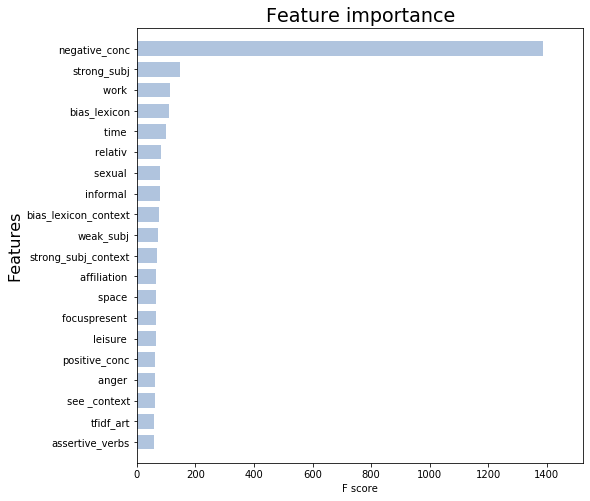

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_enrichm, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.4 All features without TF-IDF

In [25]:
x_no_tfidf = x.drop(['tfidf_art'], 1)

In [26]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_tfidf, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [27]:
feature_names = list(x_no_tfidf.columns)
len(feature_names)

289

In [28]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [29]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [30]:
xgboost_no_tfidf = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.341277	dval-F1_score:0.335958
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.346125	dval-F1_score:0.333913
[2]	dtrain-F1_score:0.343912	dval-F1_score:0.334152
[3]	dtrain-F1_score:0.341736	dval-F1_score:0.327543
[4]	dtrain-F1_score:0.344685	dval-F1_score:0.329527
[5]	dtrain-F1_score:0.350316	dval-F1_score:0.332192
[6]	dtrain-F1_score:0.354932	dval-F1_score:0.333047
[7]	dtrain-F1_score:0.361629	dval-F1_score:0.341166
[8]	dtrain-F1_score:0.356774	dval-F1_score:0.34449
[9]	dtrain-F1_score:0.361955	dval-F1_score:0.344482
[10]	dtrain-F1_score:0.359106	dval-F1_score:0.341824
[11]	dtrain-F1_score:0.364694	dval-F1_score:0.352066
[12]	dtrain-F1_score:0.366507	dval-F1_score:0.360656
[13]	dtrain-F1_score:0.367953	dval-F1_score:0.361426
[14]	dtrain-F1_score:0.370209	dval-F1_score:0.360258
[15]	dtrain-F1_score:0.370975	dval-F1_score:0.360288
[16]	dtrain-

In [31]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
xgboost_no_tfidf.save_model("xgboost_no_tfidf.model")
xgboost_no_tfidf = xgboost.Booster()
xgboost_no_tfidf.load_model("xgboost_no_tfidf.model")

In [32]:
xgboost_no_tfidf_predt = np.where(xgboost_no_tfidf.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_tfidf, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_tfidf_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_tfidf_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_tfidf_predt).transpose())

Performance of xgboost_no_tfidf, test:
F1: 0.36
Precision: 0.25
Recall: 0.61
AUC: 0.74
Accuracy: 0.85
Confusion matrix:
 [[5222  171]
 [ 809  273]]


Text(0, 0.5, 'Features')

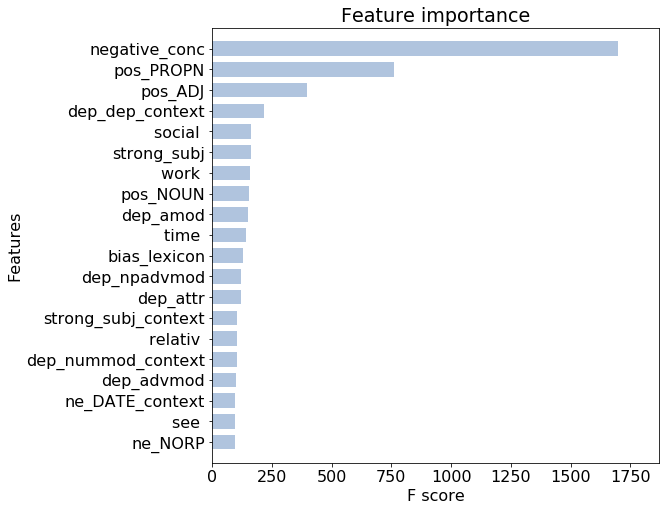

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_tfidf, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.5 All features without LIWC2015

In [34]:
x_no_liwc = x.drop(['affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context'], 1)

In [37]:
len(feature_names)

289

In [38]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_liwc, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [39]:
feature_names = list(x_no_liwc.columns)
len(feature_names)

186

In [40]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [41]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [42]:
xgboost_no_liwc = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.307013	dval-F1_score:0.303239
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.339522	dval-F1_score:0.341584
[2]	dtrain-F1_score:0.330275	dval-F1_score:0.33815
[3]	dtrain-F1_score:0.33073	dval-F1_score:0.337906
[4]	dtrain-F1_score:0.346084	dval-F1_score:0.353678
[5]	dtrain-F1_score:0.347374	dval-F1_score:0.360402
[6]	dtrain-F1_score:0.348984	dval-F1_score:0.350774
[7]	dtrain-F1_score:0.349992	dval-F1_score:0.362134
[8]	dtrain-F1_score:0.351915	dval-F1_score:0.364324
[9]	dtrain-F1_score:0.355365	dval-F1_score:0.369254
[10]	dtrain-F1_score:0.357598	dval-F1_score:0.365139
[11]	dtrain-F1_score:0.357927	dval-F1_score:0.369417
[12]	dtrain-F1_score:0.361716	dval-F1_score:0.369532
[13]	dtrain-F1_score:0.364524	dval-F1_score:0.374813
[14]	dtrain-F1_score:0.365414	dval-F1_score:0.36756
[15]	dtrain-F1_score:0.36546	dval-F1_score:0.373626
[16]	dtrain-F1_

In [43]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
xgboost_no_liwc.save_model("xgboost_no_liwc.model")
xgboost_no_liwc = xgboost.Booster()
xgboost_no_liwc.load_model("xgboost_no_liwc.model")

In [44]:
xgboost_no_liwc_predt = np.where(xgboost_no_liwc.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_liwc, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_liwc_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_liwc_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_liwc_predt).transpose())

Performance of xgboost_no_liwc, test:
F1: 0.36
Precision: 0.25
Recall: 0.64
AUC: 0.75
Accuracy: 0.84
Confusion matrix:
 [[5167  160]
 [ 864  284]]


Text(0, 0.5, 'Features')

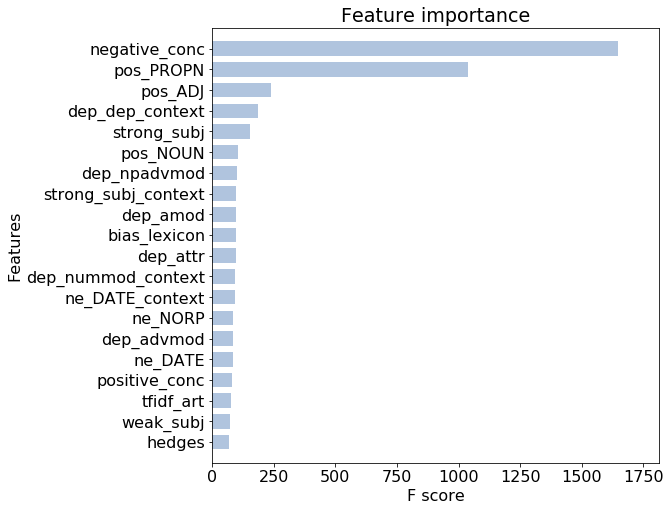

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_liwc, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.6 All features without lexical features

In [47]:
x_no_lex = x.drop(['negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'action_verbs',
 'comparative_forms',
 'modal_adverbs',
 'manner_adverbs',
 'superlative_forms',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',                   
 'hedges',
 'boosters',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'action_verbs_context',
 'comparative_forms_context',
 'modal_adverbs_context',
 'manner_adverbs_context',
 'superlative_forms_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context'], 1)

In [48]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_lex, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [49]:
feature_names = list(x_no_lex.columns)
len(feature_names)

252

In [50]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [51]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [52]:
xgboost_no_lex = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.24465	dval-F1_score:0.254424
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.260344	dval-F1_score:0.270502
[2]	dtrain-F1_score:0.28026	dval-F1_score:0.287744
[3]	dtrain-F1_score:0.278633	dval-F1_score:0.284877
[4]	dtrain-F1_score:0.280912	dval-F1_score:0.288708
[5]	dtrain-F1_score:0.288865	dval-F1_score:0.294516
[6]	dtrain-F1_score:0.290112	dval-F1_score:0.296342
[7]	dtrain-F1_score:0.292988	dval-F1_score:0.294118
[8]	dtrain-F1_score:0.295732	dval-F1_score:0.296846
[9]	dtrain-F1_score:0.295322	dval-F1_score:0.296743
[10]	dtrain-F1_score:0.300788	dval-F1_score:0.297899
[11]	dtrain-F1_score:0.300033	dval-F1_score:0.297691
[12]	dtrain-F1_score:0.30206	dval-F1_score:0.301337
[13]	dtrain-F1_score:0.305805	dval-F1_score:0.313507
[14]	dtrain-F1_score:0.309971	dval-F1_score:0.315197
[15]	dtrain-F1_score:0.311357	dval-F1_score:0.313676
[16]	dtrain-F1

In [53]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
xgboost_no_lex.save_model("xgboost_no_lex.model")
xgboost_no_lex = xgboost.Booster()
xgboost_no_lex.load_model("xgboost_no_lex.model")

In [54]:
xgboost_no_lex_predt = np.where(xgboost_no_lex.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_lex, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_lex_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_lex_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_lex_predt).transpose())

Performance of xgboost_no_lex, test:
F1: 0.31
Precision: 0.2
Recall: 0.62
AUC: 0.72
Accuracy: 0.81
Confusion matrix:
 [[4960  168]
 [1071  276]]


Text(0, 0.5, 'Features')

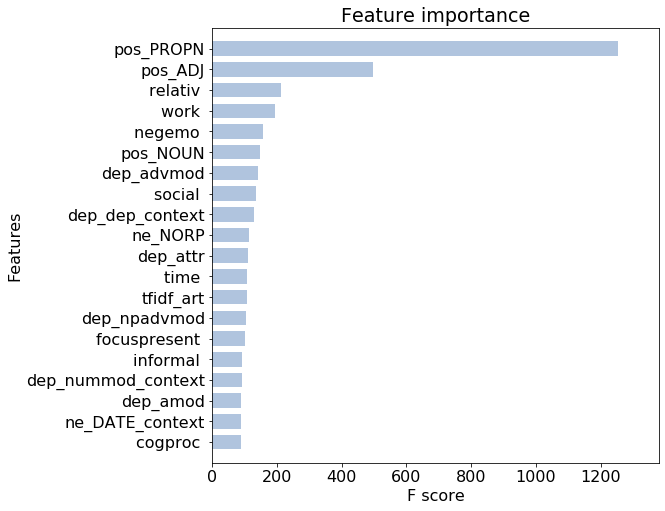

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_lex, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.7 All features without bias lexicon

In [56]:
x_no_bias_lex = x.drop(['bias_lexicon', 'bias_lexicon_context'], 1)

In [57]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_bias_lex, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [58]:
feature_names = list(x_no_bias_lex.columns)
len(feature_names)

288

In [59]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [60]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [61]:
xgboost_no_bias_lex = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.314376	dval-F1_score:0.308677
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.327306	dval-F1_score:0.32
[2]	dtrain-F1_score:0.336051	dval-F1_score:0.331858
[3]	dtrain-F1_score:0.339138	dval-F1_score:0.337296
[4]	dtrain-F1_score:0.341195	dval-F1_score:0.338733
[5]	dtrain-F1_score:0.341515	dval-F1_score:0.342302
[6]	dtrain-F1_score:0.346983	dval-F1_score:0.350592
[7]	dtrain-F1_score:0.349378	dval-F1_score:0.353289
[8]	dtrain-F1_score:0.353402	dval-F1_score:0.355791
[9]	dtrain-F1_score:0.354881	dval-F1_score:0.359517
[10]	dtrain-F1_score:0.356483	dval-F1_score:0.360509
[11]	dtrain-F1_score:0.358576	dval-F1_score:0.362297
[12]	dtrain-F1_score:0.359588	dval-F1_score:0.359567
[13]	dtrain-F1_score:0.363135	dval-F1_score:0.354136
[14]	dtrain-F1_score:0.363037	dval-F1_score:0.357298
[15]	dtrain-F1_score:0.365669	dval-F1_score:0.362319
[16]	dtrain-F1_

In [62]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
xgboost_no_bias_lex.save_model("xgboost_no_bias_lex.model")
xgboost_no_bias_lex = xgboost.Booster()
xgboost_no_bias_lex.load_model("xgboost_no_bias_lex.model")

In [63]:
xgboost_no_bias_lex_predt = np.where(xgboost_no_bias_lex.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_bias_lex, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_bias_lex_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_bias_lex_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_bias_lex_predt).transpose())

Performance of xgboost_no_bias_lex, test:
F1: 0.35
Precision: 0.24
Recall: 0.63
AUC: 0.74
Accuracy: 0.84
Confusion matrix:
 [[5138  165]
 [ 893  279]]


Text(0, 0.5, 'Features')

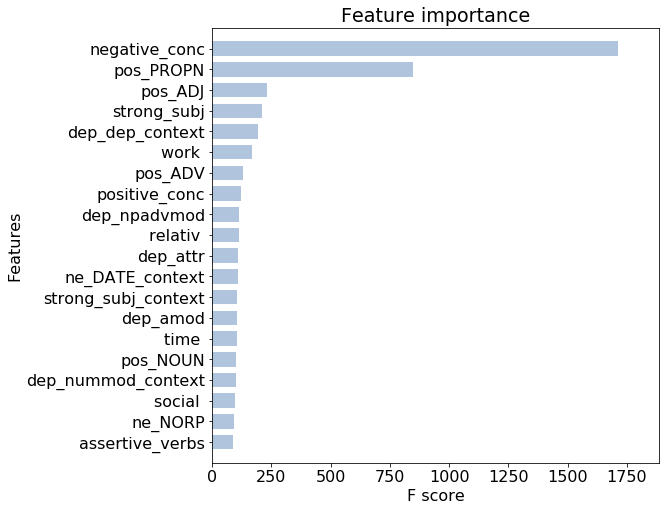

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_bias_lex, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)

### 2.8 No context

In [66]:
x_no_context = x.drop(['negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'action_verbs_context',
 'comparative_forms_context',
 'modal_adverbs_context',
 'manner_adverbs_context',
 'superlative_forms_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',                       
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
#  'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context'], 1)

In [67]:
train_features, test_features, train_labels, test_labels = train_test_split(x_no_context, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [68]:
feature_names = list(x_no_context.columns)
len(feature_names)

146

In [69]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [70]:
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [71]:
xgboost_no_context = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.319466	dval-F1_score:0.316031
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.335955	dval-F1_score:0.334728
[2]	dtrain-F1_score:0.329773	dval-F1_score:0.330218
[3]	dtrain-F1_score:0.337464	dval-F1_score:0.336973
[4]	dtrain-F1_score:0.338167	dval-F1_score:0.343032
[5]	dtrain-F1_score:0.340311	dval-F1_score:0.342262
[6]	dtrain-F1_score:0.344065	dval-F1_score:0.346183
[7]	dtrain-F1_score:0.345539	dval-F1_score:0.35303
[8]	dtrain-F1_score:0.34438	dval-F1_score:0.350333
[9]	dtrain-F1_score:0.345492	dval-F1_score:0.351471
[10]	dtrain-F1_score:0.348577	dval-F1_score:0.355099
[11]	dtrain-F1_score:0.350897	dval-F1_score:0.358476
[12]	dtrain-F1_score:0.351197	dval-F1_score:0.355426
[13]	dtrain-F1_score:0.352288	dval-F1_score:0.359124
[14]	dtrain-F1_score:0.353044	dval-F1_score:0.362573
[15]	dtrain-F1_score:0.354728	dval-F1_score:0.362838
[16]	dtrain-F

In [72]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
xgboost_no_context.save_model("xgboost_no_context.model")
xgboost_no_context = xgboost.Booster()
xgboost_no_context.load_model("xgboost_no_context.model")

In [74]:
xgboost_no_context_predt = np.where(xgboost_no_context.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_no_context, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_no_context_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_no_context_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_no_context_predt),2))
print('Confusion matrix:\n', metrics.confusion_matrix(dtest.get_label(), xgboost_no_context_predt).transpose())

Performance of xgboost_no_context, test:
F1: 0.34
Precision: 0.24
Recall: 0.64
AUC: 0.75
Accuracy: 0.83
Confusion matrix:
 [[5102  158]
 [ 929  286]]


Text(0, 0.5, 'Features')

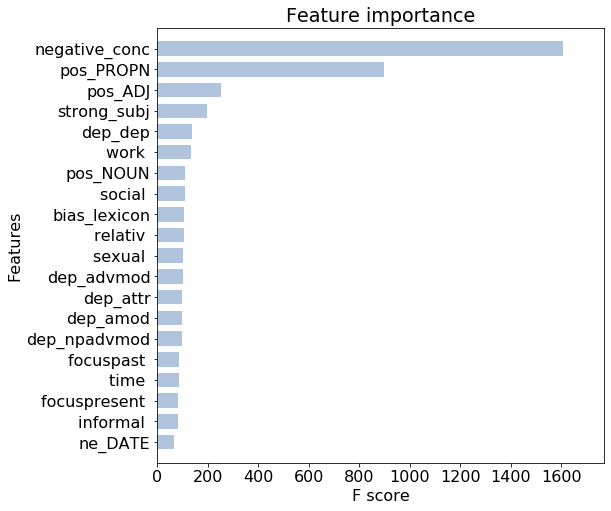

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams['font.size'] = 16

xgboost.plot_importance(xgboost_no_context, ax=ax, show_values=False, max_num_features=20,
                       importance_type='gain', height=0.7, grid=False, color='lightsteelblue')
ax.set_ylabel('Features', fontsize=16)